<a href="https://colab.research.google.com/github/Saicharan39/Machine-Learning/blob/main/soil_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
!pip install tensorflow
!pip install keras

In [103]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [104]:
img_width,img_height=224,224
batch_size=32
epochs=15

In [105]:
path='/content/drive/MyDrive/Soil_Dataset'




In [106]:
train_data_dir='/content/drive/MyDrive/Soil_Dataset/Train'
test_data_dir='/content/drive/MyDrive/Soil_Dataset/Test'

In train data there are 4 subfolders

In [107]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 4


In [108]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')

The number of files in the directory is: 175


In [109]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 144


In [110]:

from glob import glob

glob('/content/drive/MyDrive/Soil_Dataset/Train/*')



['/content/drive/MyDrive/Soil_Dataset/Train/Black_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Red_Soil']

In [111]:
labels=['Alluvial_Soil','Black_Soil','Clay_Soil','Red_Soil']

In [112]:
def show_soil(path):
 im=cv2.imread(path)
 im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
 plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
 plt.show()

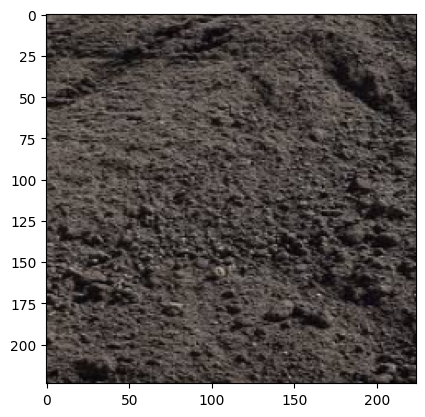

In [113]:
show_soil('/content/drive/MyDrive/Soil_Dataset/Test/Black_Soil/Black_10.jpg')

In [114]:
trainGen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen=ImageDataGenerator(rescale=1./255)

In [115]:
train=trainGen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test=testGen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)


Found 715 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


f

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,3,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,3,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))

model.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 224, 224, 128)     3584      
                                                                 
 activation_4 (Activation)   (None, 224, 224, 128)     0         
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 112, 112, 128)     0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 38, 38, 128)       147584    
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 19, 19, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 19, 19, 128)     

In [117]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [118]:
epochs=15

In [119]:
model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/15
23/23 [==============================] - 141s 6s/step - loss: 1.1033 - accuracy: 0.4559 - val_loss: 0.8377 - val_accuracy: 0.6277
Epoch 2/15
23/23 [==============================] - 138s 6s/step - loss: 0.6012 - accuracy: 0.7678 - val_loss: 0.4881 - val_accuracy: 0.7819
Epoch 3/15
23/23 [==============================] - 142s 6s/step - loss: 0.4256 - accuracy: 0.8112 - val_loss: 0.4682 - val_accuracy: 0.7660
Epoch 4/15
23/23 [==============================] - 135s 6s/step - loss: 0.3664 - accuracy: 0.8587 - val_loss: 0.5402 - val_accuracy: 0.7234
Epoch 5/15
23/23 [==============================] - 137s 6s/step - loss: 0.3722 - accuracy: 0.8490 - val_loss: 0.4101 - val_accuracy: 0.8245
Epoch 6/15
23/23 [==============================] - 138s 6s/step - loss: 0.3099 - accuracy: 0.8769 - val_loss: 0.4595 - val_accuracy: 0.8245
Epoch 7/15
23/23 [==============================] - 136s 6s/step - loss: 0.3526 - accuracy: 0.8531 - val_loss: 0.4230 - val_accuracy: 0.8032
Epoch 8/15
23

In [120]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [121]:
train_loss=model.history.history['loss']
train_loss

[1.103298306465149,
 0.6012342572212219,
 0.4255701005458832,
 0.36637163162231445,
 0.372175395488739,
 0.30986371636390686,
 0.35261350870132446,
 0.2822308838367462,
 0.22095659375190735,
 0.24044500291347504,
 0.23521143198013306,
 0.20909400284290314,
 0.19148001074790955,
 0.2136663943529129,
 0.15334728360176086]

In [122]:
train_acc=model.history.history['accuracy']
train_acc

[0.4559440612792969,
 0.7678321599960327,
 0.811188817024231,
 0.858741283416748,
 0.8489510416984558,
 0.8769230842590332,
 0.8531468510627747,
 0.8825174570083618,
 0.9104894995689392,
 0.9104894995689392,
 0.9076923131942749,
 0.9230769276618958,
 0.9202797412872314,
 0.9160839319229126,
 0.9468531608581543]

In [123]:
test_loss=model.history.history['val_loss']
test_loss

[0.8377478718757629,
 0.4880608022212982,
 0.46820032596588135,
 0.5402355790138245,
 0.41010621190071106,
 0.4594922959804535,
 0.42302191257476807,
 0.3683621287345886,
 0.40052926540374756,
 0.4308190941810608,
 0.42579030990600586,
 0.2291295826435089,
 0.28306588530540466,
 0.30825427174568176,
 0.41905978322029114]

In [124]:
test_acc=model.history.history['val_accuracy']
test_acc

[0.6276595592498779,
 0.7819148898124695,
 0.7659574747085571,
 0.7234042286872864,
 0.8244680762290955,
 0.8244680762290955,
 0.8031914830207825,
 0.813829779624939,
 0.8244680762290955,
 0.7765957713127136,
 0.8670212626457214,
 0.9255319237709045,
 0.9042553305625916,
 0.8723404407501221,
 0.8882978558540344]

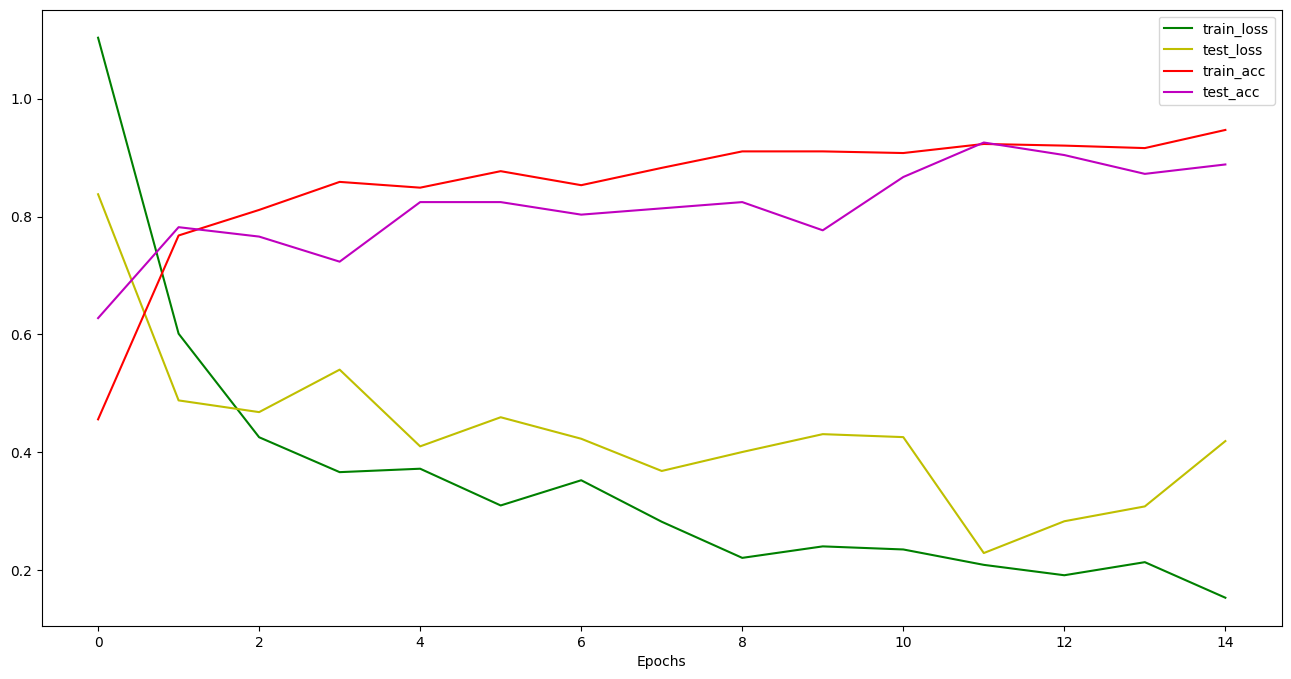

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming epochs is defined somewhere in your code
epochs = 15

# Assuming train_loss, test_loss, train_acc, and test_acc are defined somewhere in your code
# Ensure they have the same length as the number of epochs
train_loss = train_loss[:epochs]
test_loss = test_loss[:epochs]
train_acc = train_acc[:epochs]
test_acc = test_acc[:epochs]

plt.figure(figsize=(16, 8))
plt.plot(np.arange(epochs), train_loss, color='g', label='train_loss')
plt.plot(np.arange(epochs), test_loss, color='y', label='test_loss')
plt.plot(np.arange(epochs), train_acc, color='r', label='train_acc')
plt.plot(np.arange(epochs), test_acc, color='m', label='test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.show()



In [126]:
loss,acc=model.evaluate(test)
print('Test Loss:',loss)
print('Test Acc:',acc)



6/6 [==============================] - 9s 2s/step - loss: 0.4191 - accuracy: 0.8883
Test Loss: 0.4190598428249359
Test Acc: 0.8882978558540344


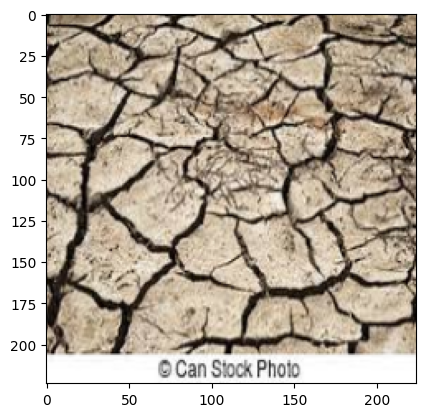

1/1 [==============================] - 0s 68ms/step
Predicted class: 2
Probability: 1.0
Predicted Class: Clay_Soil


In [134]:
def predict_soil_function(path):
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (img_height, img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

    img_pred = image.load_img(path, target_size=(img_height, img_width))
    img_pred = image.img_to_array(img_pred)
    img = np.expand_dims(img_pred, axis=0)
    predictions = model.predict(img)

    predicted_class_index = np.argmax(predictions)
    predicted_probability = predictions[0][predicted_class_index]

    print('Predicted class:', predicted_class_index)
    print('Probability: {}'.format(predicted_probability))

    if predicted_class_index == 0:
        prediction = 'Alluvial_Soil'
    elif predicted_class_index == 1:
        prediction = 'Black_Soil'
    elif predicted_class_index == 2:
        prediction = 'Clay_Soil'
    else:
        prediction = 'Red_Soil'

    print('Predicted Class:', prediction)

from keras.preprocessing import image
predict_soil_variable = '/content/drive/MyDrive/Soil_Dataset/Test/Clay_Soil/Clay_11.jpg'
predict_soil_function(predict_soil_variable)

Prediction System
